**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.simplefilter('ignore')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import data 2C_weka.csv for 2 Class Classifcation.


In [0]:
data_2C_weka = pd.read_csv('/content/drive/My Drive/Great_Lakes_Assignments/03_SupervisedLearning_Project1/2Classdata.csv')

In [5]:
data_2C_weka.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [6]:
data_2C_weka.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
199,75.298478,16.671484,61.296204,58.626995,118.883388,31.575823,Abnormal
26,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,Abnormal
14,57.300227,24.188885,47.000000,33.111342,116.806587,5.766947,Abnormal
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,Normal
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,Abnormal
25,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,Abnormal
108,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076,Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
82,88.623908,29.089453,47.564262,59.534455,121.764780,51.805899,Abnormal
106,65.013773,9.838262,57.735837,55.175511,94.738525,49.696955,Abnormal


In [7]:
data_2C_weka.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [8]:
data_2C_weka.shape

(310, 7)

In [9]:
data_2C_weka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [10]:
data_2C_weka.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pelvic_incidence,310,NaN,NaN,NaN,60.4967,17.2365,26.1479,46.4303,58.691,72.8777,129.834
pelvic_tilt numeric,310,NaN,NaN,NaN,17.5428,10.0083,-6.55495,10.6671,16.3577,22.1204,49.4319
lumbar_lordosis_angle,310,NaN,NaN,NaN,51.9309,18.5541,14,37,49.5624,63,125.742
sacral_slope,310,NaN,NaN,NaN,42.9538,13.4231,13.3669,33.3471,42.4049,52.6959,121.43
pelvic_radius,310,NaN,NaN,NaN,117.921,13.3174,70.0826,110.709,118.268,125.468,163.071
degree_spondylolisthesis,310,NaN,NaN,NaN,26.2967,37.559,-11.0582,1.60373,11.7679,41.2874,418.543
class,310,2,Abnormal,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Encode the Class variable to integer.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [12]:
#Finding unique value of class
print('Class    = ', data_2C_weka['class'].unique())

Class    =  ['Abnormal' 'Normal']


In [13]:
# So as per the alphabetical order Abnormal will be encoded as '0' and Normal will be encoded as '1'

le = LabelEncoder()
le.fit(data_2C_weka['class'])
data_2C_weka['class'] = le.transform(data_2C_weka['class'])
data_2C_weka.sample(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
183,71.001941,37.515772,84.537093,33.486169,125.164232,67.771190,0
79,47.744679,12.089351,39.000000,35.655328,117.512004,21.682401,0
273,35.877571,1.112374,43.457257,34.765197,126.923906,-1.632238,1
290,36.422485,13.879424,20.242562,22.543061,126.076861,0.179717,1
260,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,1
71,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,0
173,50.825029,9.064729,56.300000,41.760300,78.999454,23.041524,0
123,65.665347,10.540675,56.489135,55.124672,109.162777,53.932020,0
233,40.683229,9.148437,31.021593,31.534792,139.118472,-2.511619,1
13,53.572170,20.460828,33.100000,33.111342,110.966698,7.044803,0


In [14]:
# check the datatypes after encoding
data_2C_weka.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

In [15]:
#Let's check encoded value
le.inverse_transform([0,1])

array(['Abnormal', 'Normal'], dtype=object)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [16]:
x = data_2C_weka.drop(['class'],axis=1)
y = data_2C_weka[['class']]

print(x.shape)
print(y.shape)

(310, 6)
(310, 1)


In [17]:
x.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [18]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


# Split the dat as train and test with a ratio of 70:30.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [23]:
x_train.shape

(217, 6)

In [24]:
x_test.shape

(93, 6)

In [25]:
y_train.shape

(217, 1)

In [26]:
y_test.shape

(93, 1)

# Normalize your Data (X) to get values between 0 to 1.

##As per Sayan class we were thought to normalize the data after spliting it as test data should be untouched to get proper accurracy of the prediction.

## We will only normalize x_train

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Now x_train will be fit & transformed
minmax_scaler = MinMaxScaler()
scaled_x_train = minmax_scaler.fit_transform(x_train)
scaled_x_train

array([[0.47741984, 0.46001745, 0.44878839, 0.39738992, 0.19381451,
        0.18763791],
       [0.22035771, 0.34630022, 0.33893603, 0.2083533 , 0.63331985,
        0.026987  ],
       [0.52009848, 0.9847648 , 0.34367835, 0.17247823, 0.40721129,
        0.18339214],
       ...,
       [0.56734895, 0.70990721, 0.41935629, 0.35707094, 0.62267394,
        0.19876941],
       [0.36438386, 0.47154808, 0.23426249, 0.28308992, 0.44116771,
        0.        ],
       [0.0921583 , 0.46190704, 0.05995934, 0.02677405, 0.79391097,
        0.02512723]])

In [30]:
# Now x_test will be just transformed

scaled_x_test = minmax_scaler.transform(x_test)
scaled_x_test

array([[ 0.39797628,  0.4253688 ,  0.41295557,  0.33871847,  0.41317893,
         0.10292294],
       [ 0.35567325,  0.60607212,  0.33653315,  0.20657584,  0.46193148,
         0.04305865],
       [ 0.62998616,  0.55441767,  0.63199181,  0.49594972,  0.50230528,
         0.14823333],
       [ 0.44762771,  0.42431662,  0.34006791,  0.3868921 ,  0.52948492,
         0.10048089],
       [ 0.27577321,  0.32769282,  0.2416272 ,  0.27095186,  0.50713814,
         0.11974012],
       [ 0.42678217,  0.35280557,  0.42240015,  0.40312169,  0.28654356,
         0.08518738],
       [ 0.07420202,  0.19945308,  0.20261992,  0.14251659,  0.59796659,
         0.02527676],
       [ 0.44274116,  0.55793477,  0.58951682,  0.31450618,  0.35622599,
         0.15708599],
       [ 0.56758836,  0.64760403,  0.62064358,  0.38886639,  0.64073948,
         0.19175771],
       [ 0.41713295,  0.45195545,  0.55454661,  0.34362924,  0.30448745,
         0.02470784],
       [ 0.3806091 ,  0.52938996,  0.43476948,  0.

In [0]:
# Now data is ready to build the model

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_x_train, y_train)
predicted = knn_model.predict(scaled_x_test)
print("What is the Training Accuracy")
print(knn_model.score(scaled_x_train,y_train))


What is the Training Accuracy
0.8525345622119815


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [54]:
print("What is the Testing Accuracy")
print(knn_model.score(scaled_x_test,y_test))


What is the Testing Accuracy
0.7311827956989247


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

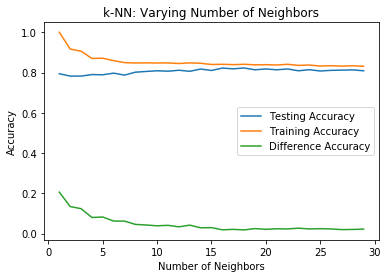

In [70]:
from matplotlib import pyplot as plt
import numpy as np

neighbors = np.arange(1, 30)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
diff_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    diff = []
    for j in range(20):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=j)
        scaled_x_train = minmax_scaler.fit_transform(x_train)
        scaled_x_test = minmax_scaler.transform(x_test)
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(scaled_x_train,y_train)
        train.append(knn_model.score(scaled_x_train,y_train))
        test.append(knn_model.score(scaled_x_test,y_test))
        diff.append((knn_model.score(scaled_x_train,y_train)) - (knn_model.score(scaled_x_test,y_test)))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    #Compute accuracy on the testing set
    diff_accuracy_plot[i] = np.mean(diff)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.plot(neighbors, diff_accuracy_plot, label = 'Difference Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

###Answer - Optimal value of K will be the value at which the difference between the Training Accuracy and Testing Accuracy is minimum. From the above we can figure out the value of K = 17

In [66]:
diff_accuracy_plot.min()

0.020967741935483876

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [83]:
data_3C_weka = pd.read_csv('/content/drive/My Drive/Great_Lakes_Assignments/03_SupervisedLearning_Project1/3Classdata.csv')
data_3C_weka.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [69]:
data_3C_weka.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
46,48.332638,22.227784,36.181993,26.104854,117.384625,6.481709,Hernia
220,44.489275,21.786433,31.474154,22.702842,113.778494,-0.284129,Normal
263,33.788843,3.675110,25.500000,30.113733,128.325356,-1.776111,Normal
262,42.517272,14.375671,25.323565,28.141601,128.905689,0.757020,Normal
189,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,Spondylolisthesis
221,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,Normal
119,60.753894,15.753894,43.199158,45.000000,113.053331,31.693548,Spondylolisthesis
164,53.941658,9.306594,43.100498,44.635064,124.397821,25.082127,Spondylolisthesis
132,69.626283,21.122751,52.766595,48.503532,116.803091,54.816867,Spondylolisthesis
99,58.521623,13.922286,41.467855,44.599337,115.514798,30.387984,Spondylolisthesis


In [71]:
data_3C_weka.dtypes


pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [74]:
data_3C_weka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [72]:
data_3C_weka.shape


(310, 7)

In [73]:
data_3C_weka.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pelvic_incidence,310,NaN,NaN,NaN,60.4967,17.2365,26.1479,46.4303,58.691,72.8777,129.834
pelvic_tilt,310,NaN,NaN,NaN,17.5428,10.0083,-6.55495,10.6671,16.3577,22.1204,49.4319
lumbar_lordosis_angle,310,NaN,NaN,NaN,51.9309,18.5541,14,37,49.5624,63,125.742
sacral_slope,310,NaN,NaN,NaN,42.9538,13.4231,13.3669,33.3471,42.4049,52.6959,121.43
pelvic_radius,310,NaN,NaN,NaN,117.921,13.3174,70.0826,110.709,118.268,125.468,163.071
degree_spondylolisthesis,310,NaN,NaN,NaN,26.2967,37.559,-11.0582,1.60373,11.7679,41.2874,418.543
class,310,3,Spondylolisthesis,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#Finding unique value of class
print('Class    = ', data_3C_weka['class'].unique())

Class    =  ['Hernia' 'Spondylolisthesis' 'Normal']


In [85]:
le_3C = LabelEncoder()
le_3C.fit(data_3C_weka['class'])
data_3C_weka['class'] = le_3C.transform(data_3C_weka['class'])
data_3C_weka.sample(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
269,37.140150,16.481240,24.000000,20.658910,125.014361,7.366425,1
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,1
37,35.703458,19.443253,20.700000,16.260205,137.540613,-0.263490,0
24,36.125683,22.758753,29.000000,13.366931,115.577116,-3.237562,0
144,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,2
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,2
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
231,53.911054,12.939318,39.000000,40.971736,118.193035,5.074353,1
61,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,2


In [86]:
# check the datatypes after encoding
data_3C_weka.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                         int64
dtype: object

In [87]:
le_3C.inverse_transform([0,1,2])

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [0]:
x3 = data_3C_weka.drop(['class'],axis=1)
y3 = data_3C_weka[['class']]

In [89]:
print(x3.shape)
print(y3.shape)

(310, 6)
(310, 1)


In [98]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=18)
print(x3_train.shape)
print(y3_train.shape)
print(x3_test.shape)
print(y3_test.shape)

(217, 6)
(217, 1)
(93, 6)
(93, 1)


In [0]:
# Now x3_train will be fit & transformed
scaled_x3_train = minmax_scaler.fit_transform(x3_train)

In [0]:
# Now x3_test will be just transformed
scaled_x3_test = minmax_scaler.transform(x3_test)

In [106]:
knn_model3 = KNeighborsClassifier(n_neighbors=5)
knn_model3.fit(scaled_x3_train, y3_train)
predicted3 = knn_model3.predict(scaled_x3_test)
print("What is the Training Accuracy")
print(knn_model3.score(scaled_x3_train,y3_train))
print("What is the Testing Accuracy")
print(knn_model3.score(scaled_x3_test,y3_test))

What is the Training Accuracy
0.847926267281106
What is the Testing Accuracy
0.7419354838709677


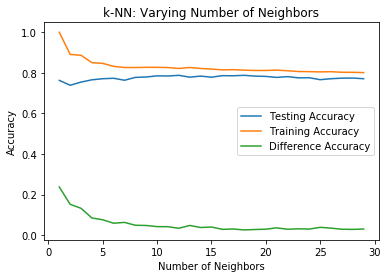

In [108]:
neighbors = np.arange(1, 30)
train_accuracy_plot3 = np.empty(len(neighbors))
test_accuracy_plot3 = np.empty(len(neighbors))
diff_accuracy_plot3 = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train3 = []
    test3 = []
    diff3 = []
    for j in range(20):
        x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.30,random_state=j)
        scaled_x3_train = minmax_scaler.fit_transform(x3_train)
        scaled_x3_test = minmax_scaler.transform(x3_test)
        knn_model3 = KNeighborsClassifier(n_neighbors=k)
        knn_model3.fit(scaled_x3_train,y3_train)
        train3.append(knn_model3.score(scaled_x3_train,y3_train))
        test3.append(knn_model3.score(scaled_x3_test,y3_test))
        diff3.append((knn_model3.score(scaled_x3_train,y3_train)) - (knn_model3.score(scaled_x3_test,y3_test)))
    #Compute accuracy on the training set
    train_accuracy_plot3[i] = np.mean(train3)
    #Compute accuracy on the testing set
    test_accuracy_plot3[i] = np.mean(test3)
    #Compute accuracy on the testing set
    diff_accuracy_plot3[i] = np.mean(diff3)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot3, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot3, label = 'Training Accuracy')
plt.plot(neighbors, diff_accuracy_plot3, label = 'Difference Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


###Answer - Optimal value of K will be the value at which the difference between the Training Accuracy and Testing Accuracy is minimum. From the above we can figure out the value of K = 17

In [112]:
diff_accuracy_plot3.min()

0.02572964669738865

In [115]:
knn_model3 = KNeighborsClassifier(n_neighbors=17)
knn_model3.fit(scaled_x3_train, y3_train)
predicted3 = knn_model3.predict(scaled_x3_test)
print("What is the Training Accuracy")
print(knn_model3.score(scaled_x3_train,y3_train))
print("What is the Testing Accuracy")
print(knn_model3.score(scaled_x3_test,y3_test))
print("What is the Difference in Training and Testing Accuracy")
print((knn_model3.score(scaled_x3_train,y3_train)) - (knn_model3.score(scaled_x3_test,y3_test)))

What is the Training Accuracy
0.8064516129032258
What is the Testing Accuracy
0.7849462365591398
What is the Difference in Training and Testing Accuracy
0.021505376344086002
